<a href="https://colab.research.google.com/github/Nicolas-Noir/AA2-TUIA-2025/blob/main/Practica/AA2_lab8_15_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8 - Búsqueda por similitud usando feature extraction.

El objetivo de es implementar un sistema de búsqueda por similitud de imágenes usando feature extraction. Para ello, se utilizará un modelo pre-entrenado de clasificación de imágenes.

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [ ]:
import os

REPO_NAME = "lab8"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)


Cloning into 'lab8'...
remote: Enumerating objects: 3021, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3021 (delta 4), reused 2 (delta 0), pack-reused 3011 (from 1)
Receiving objects: 100% (3021/3021), 64.93 MiB | 17.65 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (3003/3003), done.


Importar librerías

In [ ]:
import numpy as np
from pathlib import Path
import tensorflow as tf
from keras.layers import Input, Dense, GlobalMaxPooling2D
import matplotlib.pyplot as plt
from PIL import Image

Establecer GPU por defecto en caso de estar disponible.

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


Cargar dataset:

In [ ]:
# Directorio de los datos
TRAIN_DATA_DIRECTORY = Path("dataset")

# Tamaño del lote (batch size)
BATCH_SIZE = 32

# Tamaño de las imágenes
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

# Carga los datos.
dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DATA_DIRECTORY,
    label_mode=None,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 3000 files.


Visualizar los datos:

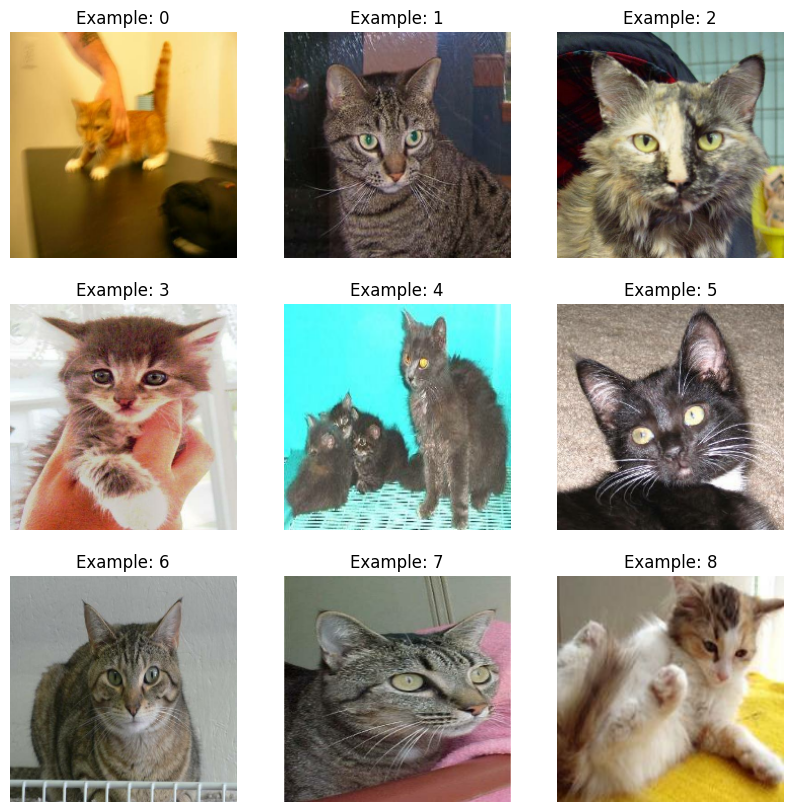

In [ ]:
# Muestra algunas imágenes de ejemplo
plt.figure(figsize=(10, 10))
for images in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Example: {i}")
    plt.axis("off")

Definimos un feature extractor.

In [ ]:
feature_extractor = tf.keras.applications.EfficientNetB0(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,3 ),
                                                include_top=False,
                                                weights='imagenet',
                                                pooling="avg"
                                                )


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Corremos el feature extractor sobre el dataset.

In [ ]:
features = feature_extractor.predict(dataset)

94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step


Asociamos cada feature con su respectiva imagen.

In [ ]:
# Obtener las imágenes correspondientes al dataset
image_paths = dataset.file_paths

# Asociar cada feature vector con su imagen correspondiente
image_features_mapping = dict(zip(image_paths, features))

Defino una función similitud, utilizo cosine_similarity:

In [ ]:
def cosine_similarity(v1, v2):
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

Ejemplo de cómo calcular similitud con `cosine_similarity`:

Similitud: 0.16796036


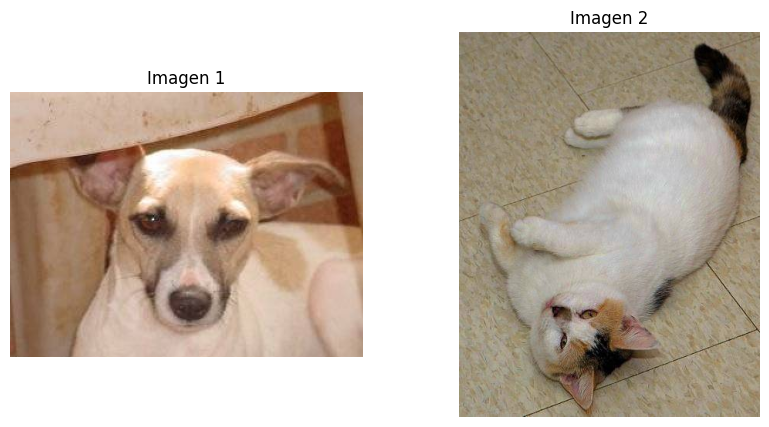

In [ ]:
path_1 = np.random.choice(image_paths)
path_2 = np.random.choice(image_paths)

v1 = image_features_mapping[path_1]
v2 = image_features_mapping[path_2]

print("Similitud:", cosine_similarity(v1, v2))

image_1 = plt.imread(path_1)
image_2 = plt.imread(path_2)

plt.figure(figsize=(10, 5))

# Subplot para la primera imagen
plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.title("Imagen 1")
plt.axis('off')

# Subplot para la segunda imagen
plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.title("Imagen 2")
plt.axis('off')

plt.show()


Completar el lab con la búsqueda por similitud.

Seleccionar una imagen al azar y buscar las 10 imágenes más similares.

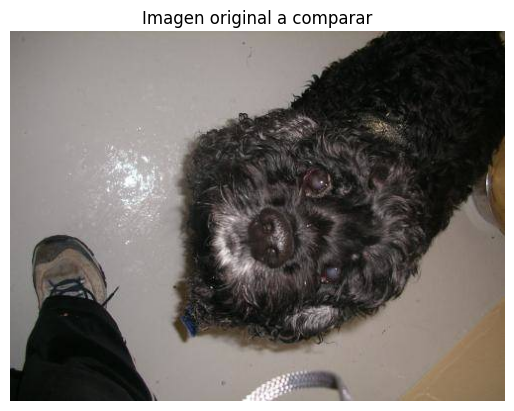

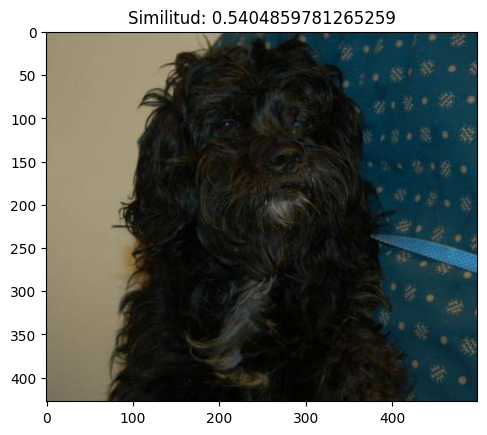

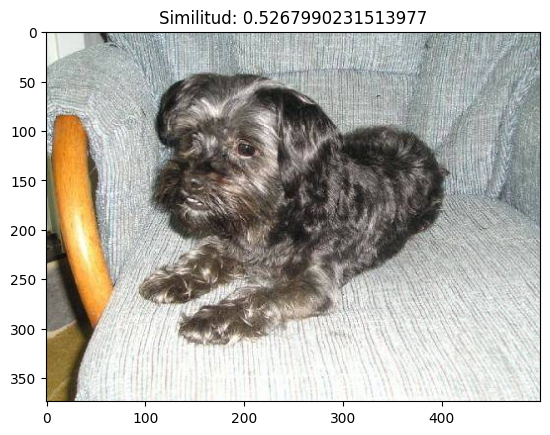

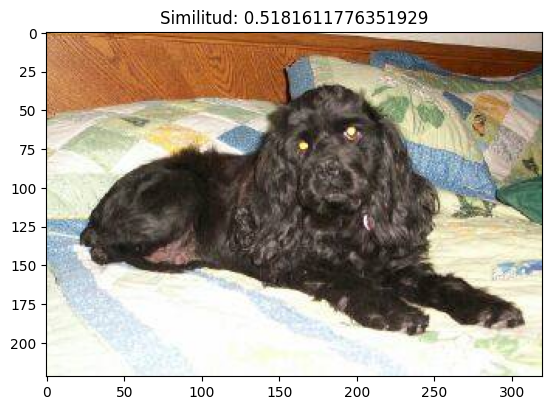

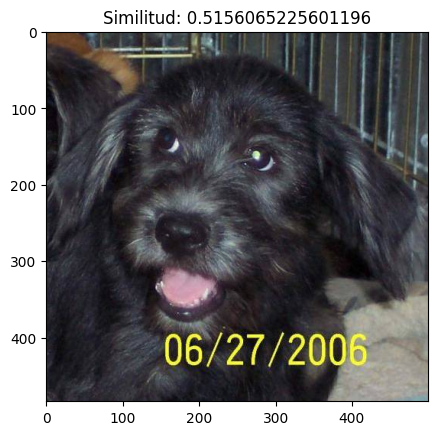

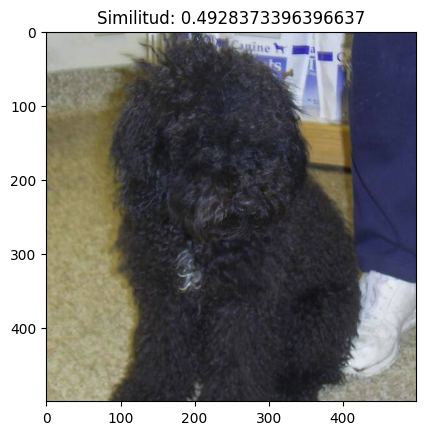

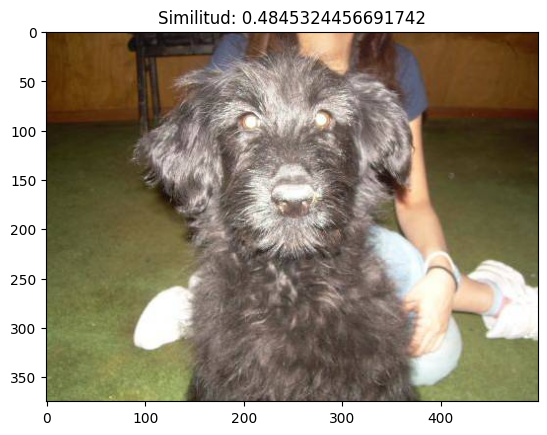

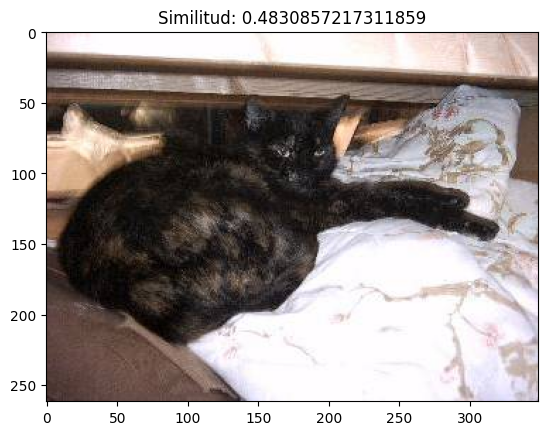

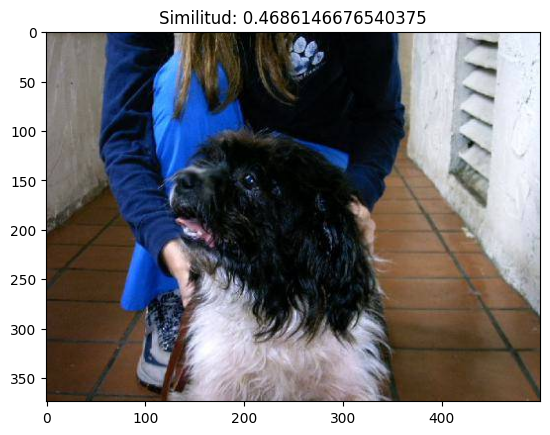

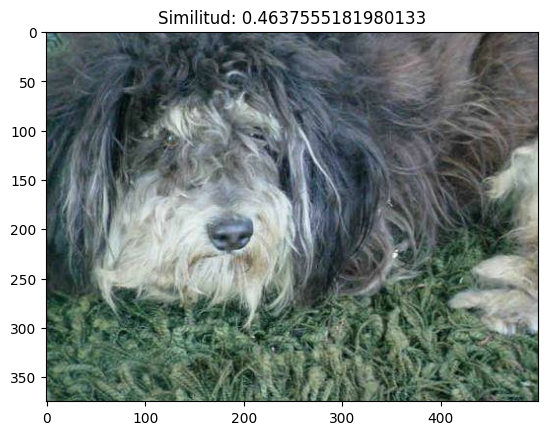

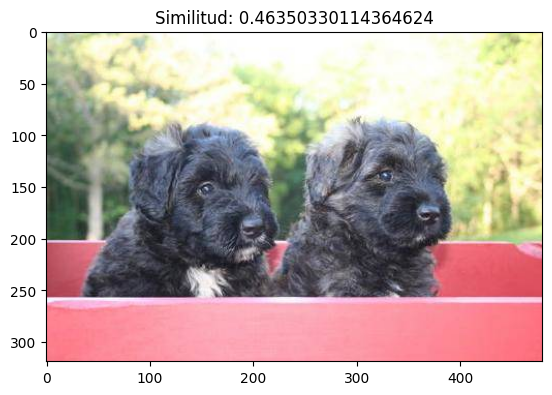

In [ ]:
lista = []

img1 = np.random.choice(image_paths)

for img2 in image_paths:
  if img1 != img2:
    v1 = image_features_mapping[img1]
    v2 = image_features_mapping[img2]
    lista.append([cosine_similarity(v1, v2), img2])

lista.sort(reverse=True)
mayor10 = lista[:10]

image_1 = plt.imread(img1)
plt.imshow(image_1)
plt.title("Imagen original a comparar")
plt.axis('off')
plt.show()

for iamgenes_similares in mayor10:
  image = plt.imread(iamgenes_similares[1])
  plt.title(f"Similitud: {iamgenes_similares[0]}")
  plt.imshow(image)
  plt.show()